# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ef8bcc97810074a1bc395195e5d6c42d


## Generate Cities List

In [100]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)


632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [146]:
city_df = pd.DataFrame(columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness',
                                'Wind Speed','Country','Date'])
city_name = ['dewitt','detroit','grand rapids','lansing']
units = "imperial"
base_url = f'http://api.openweathermap.org/data/2.5/weather?&units={units}&appid={weather_api_key}&q='
count = 1
#print(response)
# long_city = response['coord']['lon']
# lat_city = response['coord']['lat']
# maxtmp_city = response['main']['temp_max']
# hum_city = response['main']['humidity']
# cloudy_city = response['clouds']['all']
# windspd_city = response['wind']['speed']
# country_city = response['sys']['country']
# date_city = response['dt']
print('Beginning Data Retrieval')
print('________________________________________')
print("")

for i in cities:
    try:
        query_url = base_url + i
        print(f'Processing Record {count} | {i}')
        response = requests.get(query_url).json()
        city_df.loc[i] = [i,
                     response['coord']['lat'],
                     response['coord']['lon'],
                     response['main']['temp_max'],
                     response['main']['humidity'],
                     int(response['clouds']['all']),
                     response['wind']['speed'],
                     response['sys']['country'],
                     int(response['dt'])
                    ]
        count += 1        
        
    except KeyError:
        print ('City Not Found. Skipping...')
        count += 1
print('________________________________________')
print('Data Retrieval Complete')
print('________________________________________')

Beginning Data Retrieval
________________________________________

Processing Record 1 | dikson
Processing Record 2 | rikitea
Processing Record 3 | jimo
Processing Record 4 | taolanaro
City Not Found. Skipping...
Processing Record 5 | harper
Processing Record 6 | kijang
Processing Record 7 | jamestown
Processing Record 8 | tilichiki
Processing Record 9 | iqaluit
Processing Record 10 | ushuaia
Processing Record 11 | sompeta
Processing Record 12 | hermanus
Processing Record 13 | borjomi
Processing Record 14 | yakeshi
Processing Record 15 | askino
Processing Record 16 | langxiang
Processing Record 17 | vanimo
Processing Record 18 | garm
City Not Found. Skipping...
Processing Record 19 | saint-philippe
Processing Record 20 | port alfred
Processing Record 21 | hithadhoo
Processing Record 22 | qaanaaq
Processing Record 23 | tromso
Processing Record 24 | santa fe
Processing Record 25 | pyay
Processing Record 26 | tasiilaq
Processing Record 27 | cidreira
Processing Record 28 | barrow
Processin

Processing Record 235 | padang
Processing Record 236 | sinnamary
Processing Record 237 | waipawa
Processing Record 238 | brownsville
Processing Record 239 | xingyi
Processing Record 240 | dingle
Processing Record 241 | ingham
Processing Record 242 | deputatskiy
Processing Record 243 | jieshou
Processing Record 244 | grand river south east
City Not Found. Skipping...
Processing Record 245 | bengkulu
Processing Record 246 | naze
Processing Record 247 | calabozo
Processing Record 248 | yatou
Processing Record 249 | shieli
Processing Record 250 | grootfontein
Processing Record 251 | praia da vitoria
Processing Record 252 | airai
Processing Record 253 | rio gallegos
Processing Record 254 | georgetown
Processing Record 255 | benicarlo
Processing Record 256 | yar-sale
Processing Record 257 | severo-kurilsk
Processing Record 258 | pousat
City Not Found. Skipping...
Processing Record 259 | norman wells
Processing Record 260 | salinas
Processing Record 261 | mys shmidta
City Not Found. Skipping.

Processing Record 468 | ekhabi
Processing Record 469 | sur
Processing Record 470 | burnie
Processing Record 471 | easley
Processing Record 472 | tiznit
Processing Record 473 | oussouye
Processing Record 474 | zhelyabovka
Processing Record 475 | abaza
Processing Record 476 | lahij
Processing Record 477 | marang
Processing Record 478 | bonga
Processing Record 479 | galiwinku
City Not Found. Skipping...
Processing Record 480 | bairiki
Processing Record 481 | buarcos
Processing Record 482 | muscat
Processing Record 483 | srednekolymsk
Processing Record 484 | matagami
Processing Record 485 | januaria
Processing Record 486 | asau
Processing Record 487 | kiama
Processing Record 488 | gerash
Processing Record 489 | cavaillon
Processing Record 490 | touros
Processing Record 491 | krasnoselkup
Processing Record 492 | scranton
Processing Record 493 | sisimiut
Processing Record 494 | arbuzynka
Processing Record 495 | petropavlivka
Processing Record 496 | melipilla
Processing Record 497 | manokwari

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [147]:
city_df = city_df.reset_index(drop=True)
city_df['Humidity'] = city_df['Humidity'].astype(str).astype(float)
city_df['Cloudiness'] = city_df['Cloudiness'].astype(str).astype(float)
city_df['Date'] = city_df['Date'].astype(str).astype(float)
city_df.to_csv('city_data_export.csv')

city_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [148]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,5.950000e+02
mean,21.965109,20.022992,47.072941,78.115966,59.633613,7.813092,1.609809e+09
std,33.378129,90.372895,32.340079,16.382887,40.134247,5.900482,1.088197e+02
min,-54.800000,-175.200000,-47.060000,17.000000,0.000000,0.090000,1.609808e+09
25%,-6.170000,-60.735000,29.325000,72.000000,20.000000,3.360000,1.609809e+09
50%,28.420000,25.070000,57.200000,82.000000,75.000000,5.990000,1.609809e+09
75%,50.125000,102.660000,74.110000,89.000000,100.000000,11.030000,1.609809e+09
max,78.220000,178.420000,93.160000,100.000000,100.000000,40.260000,1.609809e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

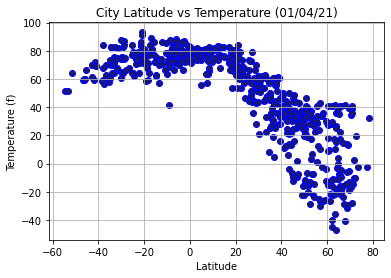

In [187]:
plt.figure(figsize=(6,4))
plt.scatter(city_df['Lat'],city_df['Max Temp'],color='midnightblue',edgecolors='b')

plt.title(f"City Latitude vs Temperature ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

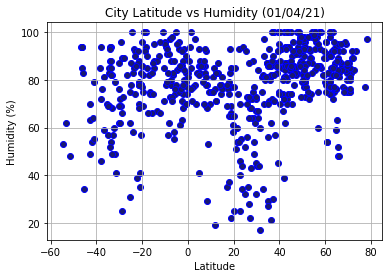

In [186]:
plt.figure(figsize=(6,4))
plt.scatter(city_df['Lat'],city_df['Humidity'],color='midnightblue',edgecolors='b')

plt.title(f"City Latitude vs Humidity ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

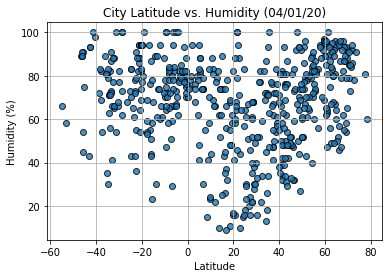

## Latitude vs. Cloudiness Plot

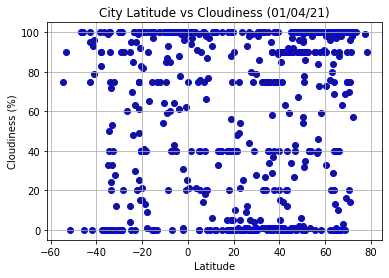

In [188]:
plt.figure(figsize=(6,4))
plt.scatter(city_df['Lat'],city_df['Cloudiness'],color='midnightblue',edgecolors='b')

plt.title(f"City Latitude vs Cloudiness ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

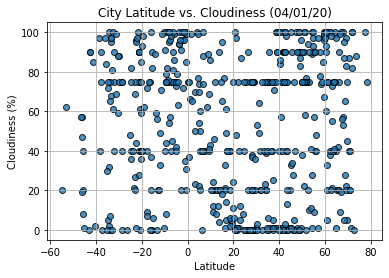

## Latitude vs. Wind Speed Plot

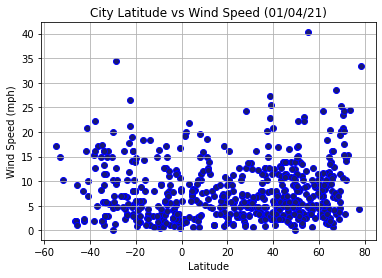

In [189]:
plt.figure(figsize=(6,4))
plt.scatter(city_df['Lat'],city_df['Wind Speed'],color='midnightblue',edgecolors='b')

plt.title(f"City Latitude vs Wind Speed ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [193]:
#create df to house Northern Hemisphere city data
nh_mask = city_df['Lat'] > 0
nh_cities = city_df[nh_mask]

#create df to house Southern Hemisphere city data
sh_mask = city_df['Lat'] < 0
sh_cities = city_df[sh_mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8078759938284706


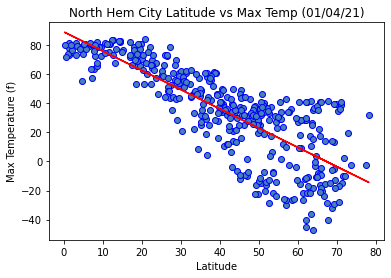

In [219]:
print(f"The r-value is: {linregress(nh_cities['Max Temp'],nh_cities['Lat'])[2]}")

plt.figure(figsize=(6,4))
plt.scatter(nh_cities['Lat'],nh_cities['Max Temp'],color='steelblue',edgecolors='b')
m, b = np.polyfit(nh_cities['Lat'],nh_cities['Max Temp'], 1)

plt.plot(nh_cities['Lat'], m*nh_cities['Lat'] + b,color='red')
plt.title(f"North Hem City Latitude vs Max Temp ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.show()

The r-value is: 0.46937863826630627


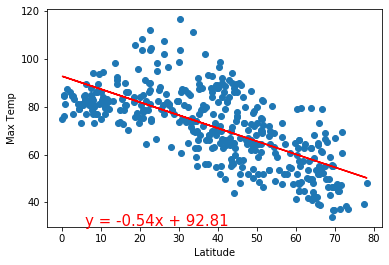

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46544848458072974


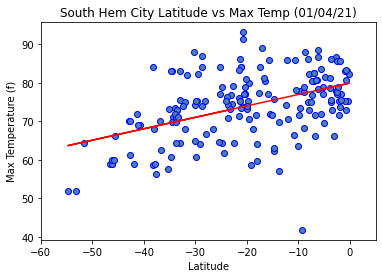

In [220]:
print(f"The r-value is: {linregress(sh_cities['Max Temp'],sh_cities['Lat'])[2]}")

plt.figure(figsize=(6,4))
plt.xlim(-60, 5)
plt.scatter(sh_cities['Lat'],sh_cities['Max Temp'],color='steelblue',edgecolors='b')
m, b = np.polyfit(sh_cities['Lat'],sh_cities['Max Temp'],1)

plt.plot(sh_cities['Lat'], m*sh_cities['Lat'] + b,color='red')
plt.title(f"South Hem City Latitude vs Max Temp ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.show()

The r-value is: 0.6082708688906918


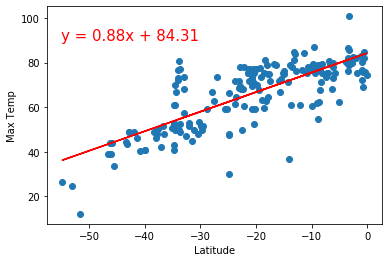

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3214316523867172


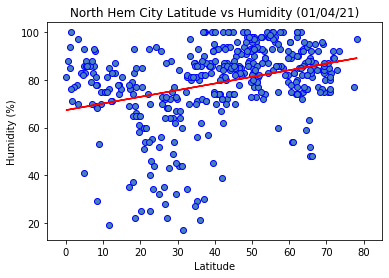

In [224]:
print(f"The r-value is: {linregress(nh_cities['Humidity'],nh_cities['Lat'])[2]}")

plt.figure(figsize=(6,4))
plt.xlim(-5, 85)
plt.scatter(nh_cities['Lat'],nh_cities['Humidity'],color='steelblue',edgecolors='b')
m, b = np.polyfit(nh_cities['Lat'],nh_cities['Humidity'],1)

plt.plot(nh_cities['Lat'], m*nh_cities['Lat'] + b,color='red')
plt.title(f"North Hem City Latitude vs Humidity ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

The r-value is: 0.000543987878808455


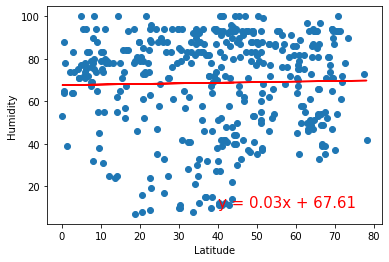

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.28619614698495366


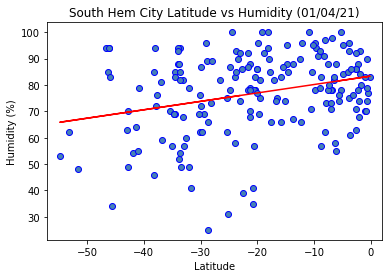

In [233]:
print(f"The r-value is: {linregress(sh_cities['Humidity'],sh_cities['Lat'])[2]}")

plt.figure(figsize=(6,4))
plt.xlim(-57, 2)
plt.scatter(sh_cities['Lat'],sh_cities['Humidity'],color='steelblue',edgecolors='b')
m, b = np.polyfit(sh_cities['Lat'],sh_cities['Humidity'],1)

plt.plot(sh_cities['Lat'], m*sh_cities['Lat'] + b,color='red')
plt.title(f"South Hem City Latitude vs Humidity ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

The r-value is: 0.014985174297345524


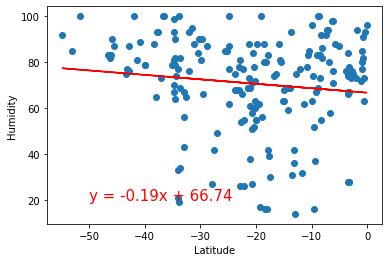

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22135008827198507


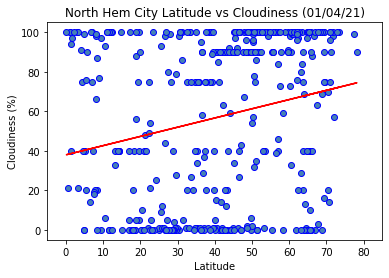

In [236]:
print(f"The r-value is: {linregress(nh_cities['Cloudiness'],nh_cities['Lat'])[2]}")

plt.figure(figsize=(6,4))
plt.xlim(-5, 85)
plt.scatter(nh_cities['Lat'],nh_cities['Cloudiness'],color='steelblue',edgecolors='b')
m, b = np.polyfit(nh_cities['Lat'],nh_cities['Cloudiness'],1)

plt.plot(nh_cities['Lat'], m*nh_cities['Lat'] + b,color='red')
plt.title(f"North Hem City Latitude vs Cloudiness ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The r-value is: 0.0020898727664228514


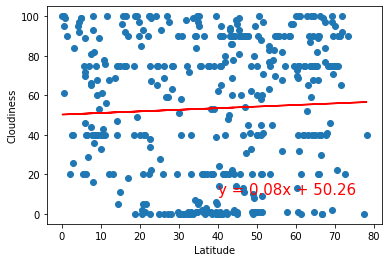

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18848242273074423


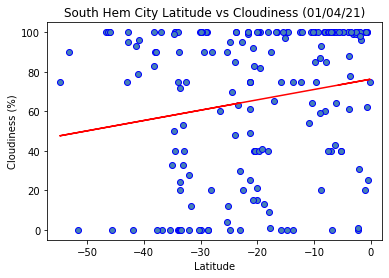

In [235]:
print(f"The r-value is: {linregress(sh_cities['Cloudiness'],sh_cities['Lat'])[2]}")

plt.figure(figsize=(6,4))
plt.xlim(-57, 2)
plt.scatter(sh_cities['Lat'],sh_cities['Cloudiness'],color='steelblue',edgecolors='b')
m, b = np.polyfit(sh_cities['Lat'],sh_cities['Cloudiness'],1)

plt.plot(sh_cities['Lat'], m*sh_cities['Lat'] + b,color='red')
plt.title(f"South Hem City Latitude vs Cloudiness ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The r-value is: 0.0035263772085582894


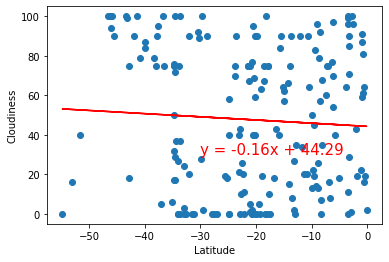

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17872690713644165


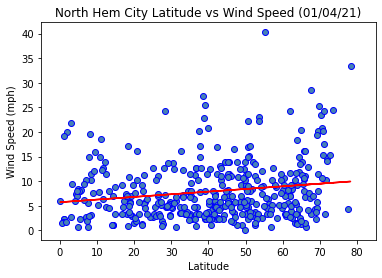

In [237]:
print(f"The r-value is: {linregress(nh_cities['Wind Speed'],nh_cities['Lat'])[2]}")

plt.figure(figsize=(6,4))
plt.xlim(-5, 85)
plt.scatter(nh_cities['Lat'],nh_cities['Wind Speed'],color='steelblue',edgecolors='b')
m, b = np.polyfit(nh_cities['Lat'],nh_cities['Wind Speed'],1)

plt.plot(nh_cities['Lat'], m*nh_cities['Lat'] + b,color='red')
plt.title(f"North Hem City Latitude vs Wind Speed ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

The r-value is: 0.04019723576144484


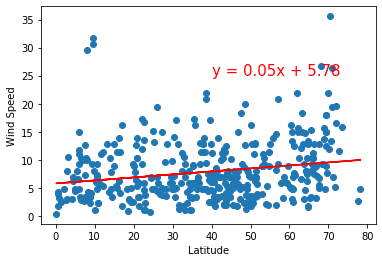

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21893706045398317


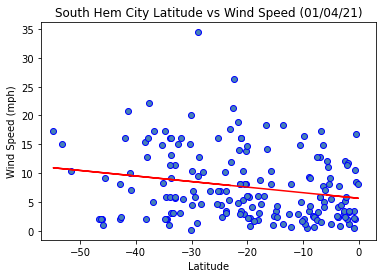

In [250]:
print(f"The r-value is: {linregress(sh_cities['Wind Speed'],sh_cities['Lat'])[2]}")

plt.figure(figsize=(6,4))
plt.xlim(-57, 3)
plt.scatter(sh_cities['Lat'],sh_cities['Wind Speed'],color='steelblue',edgecolors='b')
m, b = np.polyfit(sh_cities['Lat'],sh_cities['Wind Speed'],1)

plt.plot(sh_cities['Lat'], m*sh_cities['Lat'] + b,color='red',label='y={:.2f}x+{:.2f}'.format(m,b))
plt.title(f"South Hem City Latitude vs Wind Speed ({pd.Timestamp('today').strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

The r-value is: 0.017128274759839232


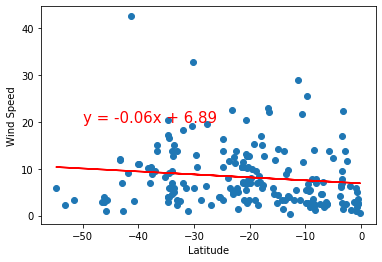